In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
%matplotlib inline

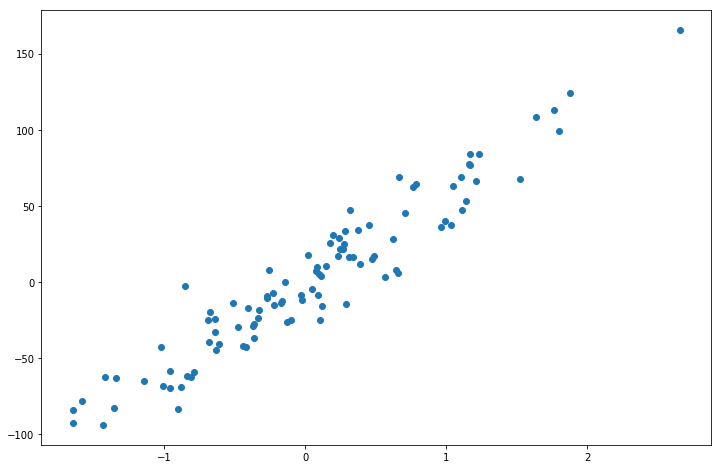

In [3]:
X, y = make_regression(n_features=1, noise=15)
fig = plt.figure(figsize=(12, 8))
plt.scatter(X, y)
X_train = np.hstack((np.ones((X.shape[0], 1)), X))

In [4]:
# setup Simple Regression
n_features = 1
n_samples = X_train.shape[0]
X_inp = tf.placeholder(dtype=tf.float32, shape=(n_samples, 2))
weights = tf.Variable(tf.random_normal((1, 2)))
y_pred = tf.matmul(weights, tf.transpose(X_inp))
error = tf.losses.mean_squared_error(y.reshape(-1, 1), tf.transpose(y_pred))
init = tf.global_variables_initializer()  

# Reduce error by gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(error)

In [9]:
with tf.Session() as sess:
    sess.run(init)
    n_iterations = 500
    for i in range(n_iterations):
        sess.run(train, feed_dict={X_inp: X_train})
        print("Loss at iteration {0} : {1:.2f}".format(i, sess.run(error, feed_dict={X_inp: X_train})))
    y_pred_plot = sess.run(y_pred, feed_dict={X_inp: X_train})

Loss at iteration 0 : 2532.04
Loss at iteration 1 : 2465.49
Loss at iteration 2 : 2400.87
Loss at iteration 3 : 2338.13
Loss at iteration 4 : 2277.22
Loss at iteration 5 : 2218.08
Loss at iteration 6 : 2160.66
Loss at iteration 7 : 2104.91
Loss at iteration 8 : 2050.77
Loss at iteration 9 : 1998.21
Loss at iteration 10 : 1947.18
Loss at iteration 11 : 1897.63
Loss at iteration 12 : 1849.52
Loss at iteration 13 : 1802.81
Loss at iteration 14 : 1757.45
Loss at iteration 15 : 1713.41
Loss at iteration 16 : 1670.64
Loss at iteration 17 : 1629.12
Loss at iteration 18 : 1588.80
Loss at iteration 19 : 1549.65
Loss at iteration 20 : 1511.63
Loss at iteration 21 : 1474.72
Loss at iteration 22 : 1438.88
Loss at iteration 23 : 1404.07
Loss at iteration 24 : 1370.28
Loss at iteration 25 : 1337.46
Loss at iteration 26 : 1305.59
Loss at iteration 27 : 1274.65
Loss at iteration 28 : 1244.60
Loss at iteration 29 : 1215.42
Loss at iteration 30 : 1187.09
Loss at iteration 31 : 1159.57
Loss at iteration 

Loss at iteration 369 : 232.33
Loss at iteration 370 : 232.33
Loss at iteration 371 : 232.32
Loss at iteration 372 : 232.32
Loss at iteration 373 : 232.32
Loss at iteration 374 : 232.32
Loss at iteration 375 : 232.32
Loss at iteration 376 : 232.32
Loss at iteration 377 : 232.32
Loss at iteration 378 : 232.32
Loss at iteration 379 : 232.31
Loss at iteration 380 : 232.31
Loss at iteration 381 : 232.31
Loss at iteration 382 : 232.31
Loss at iteration 383 : 232.31
Loss at iteration 384 : 232.31
Loss at iteration 385 : 232.31
Loss at iteration 386 : 232.31
Loss at iteration 387 : 232.31
Loss at iteration 388 : 232.31
Loss at iteration 389 : 232.31
Loss at iteration 390 : 232.30
Loss at iteration 391 : 232.30
Loss at iteration 392 : 232.30
Loss at iteration 393 : 232.30
Loss at iteration 394 : 232.30
Loss at iteration 395 : 232.30
Loss at iteration 396 : 232.30
Loss at iteration 397 : 232.30
Loss at iteration 398 : 232.30
Loss at iteration 399 : 232.30
Loss at iteration 400 : 232.30
Loss at 

Text(0.5,1,'Simple Linear Regression using TensorFlow')

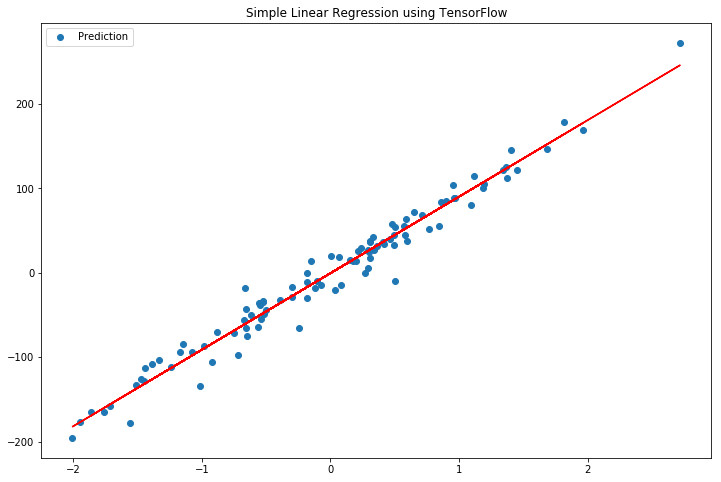

In [8]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(X, y, label="Prediction")
plt.plot(X, y_pred_plot.T, color="red")
plt.legend()
plt.title("Simple Linear Regression using TensorFlow")

## TensorFlow Estimator API

TensorFlow by default has some models implemented. So you don't have to do it by yourself (like above) These implementations are listen in the Estimator API. It provides various features like training, evaluating, prediction, exporting model, etc. You can also inherit `Estimator` and create your own estimator. 

Steps to using Estimator API:
1. Define list of feature columns.
2. Create the Estimator model. 
3. Create a data input function.
4. Call train, evaluate, and predict on the Estimator object. 



### 1. Define list of feature columns

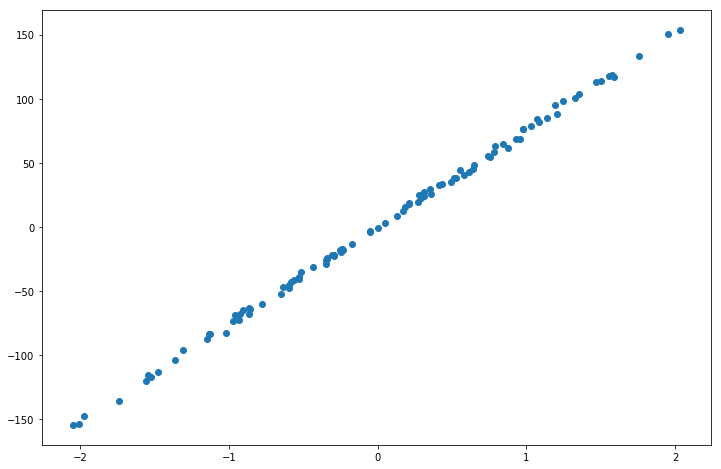

In [5]:
X, y = make_regression(n_features=1, noise=2)
fig = plt.figure(figsize=(12, 8))
plt.scatter(X, y)

In [6]:
# shape = 1 since we only have 1 feature
feat_cols = [tf.feature_column.numeric_column("X", shape=[1])]
# create estimator, pass in the features

### 2. Create Estimator

In [7]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)
# ignore the warnings

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpevbf55ce', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7efbaabd8ba8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [8]:
# create train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y.reshape(-1, 1), test_size=0.2)

### 3. Create data input function

In [9]:
input_function = tf.estimator.inputs.numpy_input_fn({"X": X.ravel()}, y, batch_size=4, shuffle=True, num_epochs=None)

train_input_function = tf.estimator.inputs.numpy_input_fn({"X": X_train}, y_train.reshape(-1, 1), batch_size=8, 
                                                    num_epochs=None, shuffle=False)

test_input_function = tf.estimator.inputs.numpy_input_fn({"X": X_test}, y_test.reshape(-1, 1), batch_size=8, 
                                                    num_epochs=None, shuffle=False)

### 4. Train Estimator

In [10]:
# steps is the maximum number of steps to take
# while training
estimator.train(input_fn=input_function, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpevbf55ce/model.ckpt.
INFO:tensorflow:loss = 32492.004, step = 1
INFO:tensorflow:global_step/sec: 356.786
INFO:tensorflow:loss = 28372.191, step = 101 (0.286 sec)
INFO:tensorflow:global_step/sec: 410.94
INFO:tensorflow:loss = 17810.11, step = 201 (0.241 sec)
INFO:tensorflow:global_step/sec: 473.588
INFO:tensorflow:loss = 23634.676, step = 301 (0.213 sec)
INFO:tensorflow:global_step/sec: 475.631
INFO:tensorflow:loss = 22925.46, step = 401 (0.210 sec)
INFO:tensorflow:global_step/sec: 381.111
INFO:tensorflow:loss = 35689.633, step = 501 (0.269 sec)
INFO:tensorflow:global_step/sec: 341.871
INFO:tensorflow:loss = 12368.4375, step = 601 (0.296 sec)
INFO:tensorflow:global_step/sec: 374.349
INFO:tensorflow:lo

In [11]:
train_metrics = estimator.evaluate(input_fn=train_input_function, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-03-09-02:50:26
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpevbf55ce/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-03-09-02:50:29
INFO:tensorflow:Saving dict for global step 1000: average_loss = 4250.3013, global_step = 1000, loss = 34002.41


In [13]:
train_metrics

{'average_loss': 4250.3013, 'global_step': 1000, 'loss': 34002.41}

In [14]:
test_metrics = estimator.evaluate(input_fn=test_input_function, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-03-09-02:51:10
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpevbf55ce/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-03-09-02:51:12
INFO:tensorflow:Saving dict for global step 1000: average_loss = 2590.2996, global_step = 1000, loss = 20722.396


In [15]:
test_metrics

{'average_loss': 2590.2996, 'global_step': 1000, 'loss': 20722.396}

In [24]:
input_function_predict = tf.estimator.inputs.numpy_input_fn({"X": X}, shuffle=False)

y_pred = estimator.predict(input_fn=input_function_predict)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpevbf55ce/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


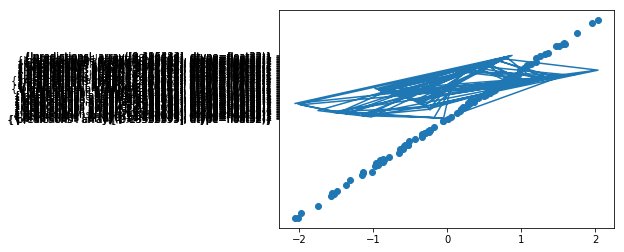

In [25]:
plt.scatter(X, y)
plt.plot(X, np.array(list(y_pred)))

In [23]:
np.array(list(y_pred))

array([], dtype=float64)

In [ ]:
# Fix me